<center><img src=https://cdn.diabetesselfmanagement.com/2019/05/Turn-Into.jpg width="700" height="400"> </center>
source https://cdn.diabetesselfmanagement.com/2019/05/Turn-Into.jpg 

Here are my other notebooks....Do checkout if you find my work helpful, happy learning.

1.[Predicting If Customer will borrow Personal Loan ](http://www.kaggle.com/yogidsba/personal-loan-logistic-regression-decision-tree)

2.[Predict Prices of Used cars](https://www.kaggle.com/yogidsba/predict-used-car-prices-linearregression)

3.[Insurance Claim Hypothesis Testing](http://www.kaggle.com/yogidsba/insurance-claims-eda-hypothesis-testing)

4.[Basic EDA on Covid vaccination](http://www.kaggle.com/yogidsba/basic-eda-on-covid-vaccination)

5.[Pandas Tutorial](http://www.kaggle.com/yogidsba/pandas-function-and-data-analysis)

6.[Case study EDA on cardio good fitness](http://www.kaggle.com/yogidsba/casestudy-eda-for-cardio-good-fitness)

**Table of Contents**
    
- [Problem Statement](#Problem-Statement) 
- [Data Set](#Data-Set)
- [Question](#Questions)
- [Read and Understand Data](#Read-and-Understand-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis) 
    - [Univariate Analysis](#Univariate-Analysis) 
    - [Bivariate and Multivariate Analysis](#Bivariate-&-Multivariate-Analysis) 
- [Insights based on EDA](#Insights-based-on-EDA)
- [Model Building](#Model-building)
- [Conclusion](#Conclusion) 



# Problem Statement
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes. 

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems. 
Even though it's incurable, it can be managed by treatment and medication.

**Motivation :- As a person who suffered from gestational diabetes I want to get better understanding of this disease among women and use machine learning models to identify patients who are at risk of diabetes.**

**This week I started learning about Ensemble techniques so trying to use them**


# Objective:

To build a model to predict whether an individual is at risk of diabetes or not.

# DataSet Description:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

# Questions
1. What are the factors that affect the likelihood of diabetes?
2. Does family history of diabetes , can increases chances of daibetes in patients.?
3. As number of pregnancies increase , does it increase chances of women getting diabetes.?
4. Is diabetes more prevalent in women who are obese.?

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric
plt.style.use('ggplot')
print('Load Libraries-Done')

Load Libraries-Done


# Read and Understand Data

In [2]:
pima=pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
# copying data to another varaible to avoid any changes to original data
data=pima.copy()
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns') # fstring 

There are 768 rows and 9 columns


In [3]:
#View the first and last 5 rows of the dataset.
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Check datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print ("#"*40,"\n","Features : \n\n", data.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", data.isnull().sum().sort_values(ascending=False))
print ("#"*40,"\nUnique values :  \n\n", data.nunique())  #  count of unique values


######################################## 
 Features : 

 ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
######################################## 
Missing values :

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
######################################## 
Unique values :  

 Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


**Observations**
* All variables are integer or float types.
* There are no missing  values in the dataset.
* Outcome is our Target Variable.


In [6]:
# Summary of the dataset.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Observations** 
* Data set contains women with an average of `4 `pregnancies and maximum of `17.`
* Features like Glucose, BloodPressure, SkinThickness, and Insulin have minimum values as 0 which might be data input errors and  should explore it further.
* Difference between maximum value for features like SkinThickness, Insulin and Age and 3rd quartile which suggest ,there might be outliers present in the data.
* Average age of women in the dataset is`33` years and median is`29`.

# Exploratory Data Analysis

### Univariate analysis

In [7]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.distplot(data,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

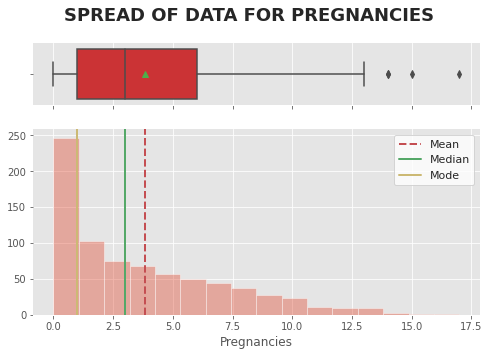

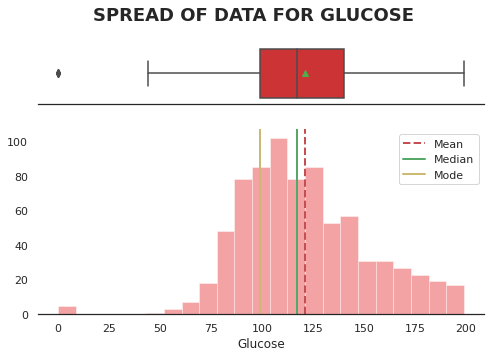

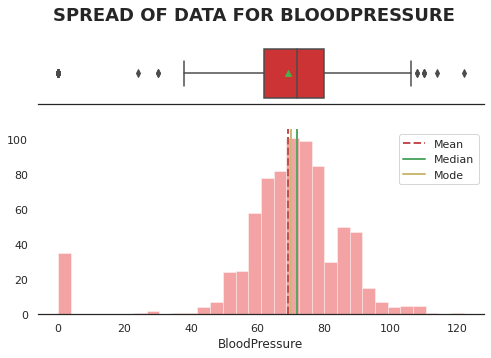

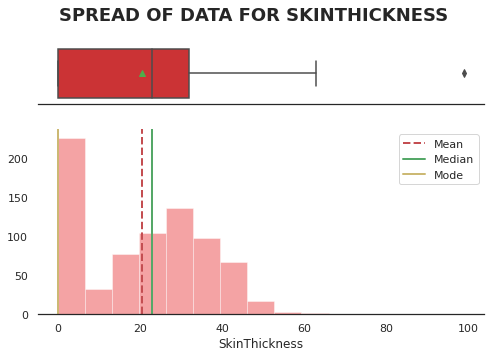

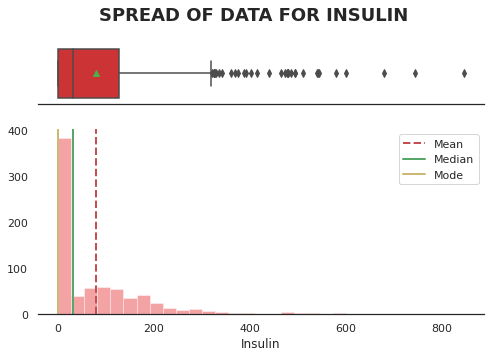

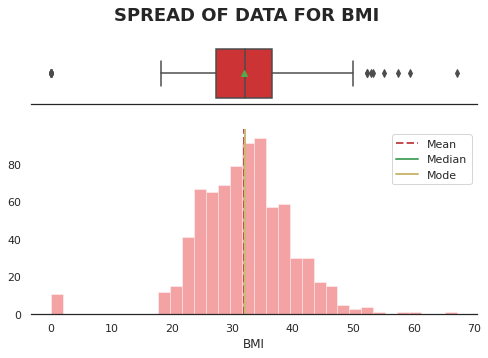

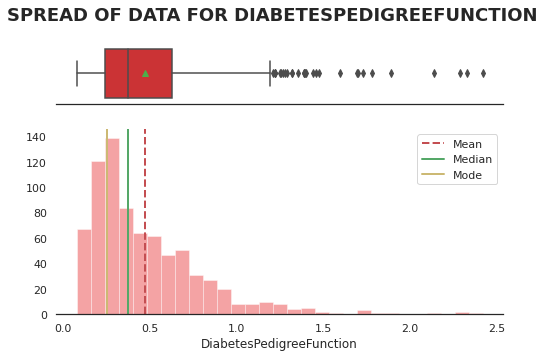

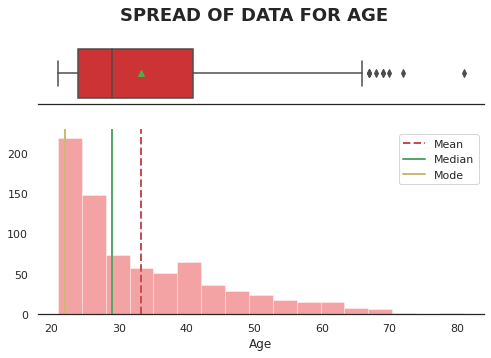

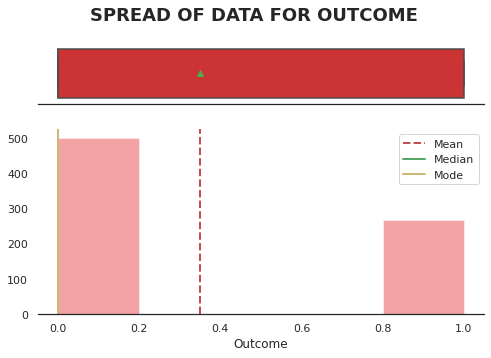

In [8]:
#select all quantitative columns for checking the spread
list_col= data.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(data[list_col[i]])

**Observations**
* Number of pregnancies is right-skewed.The boxplot shows that there are few outliers to the right. 
* Plasma glucode is normally distrubted.0 value is an outlier for this variable. 
* The distribution for blood pressure looks fairy normal except few outliers evident from the boxplot. We can see are some observations with 0 blood pressure but a 0 value of blood pressure is not possible and we should treat the 0 value as missing data.Most of the women have normal blood pressure.
* There are one extreme value of 99 in Skin thickness, many value with 0 value of skin thicknessand we should treat the 0 values as missing data.
* Insulin is right-skewed. There are some outliers to the right  A 0 value in insulin is not possible. We should treat the 0 values as missing data.75% of women have less than 127 mu U/ml of insulin concentration and an average of 80 mu U/ml.
* BMI is normally distributed with the mean and median of approximately 32.There are some outliers in this variable. A 0 value in mass is not possible we should treat the 0 values as missing data.
* Diabetes pedigree function  is skewed to the right and there are some outliers in this variable.
* Age is right-skewed.There are outliers on higher end. 

### Observations on Class

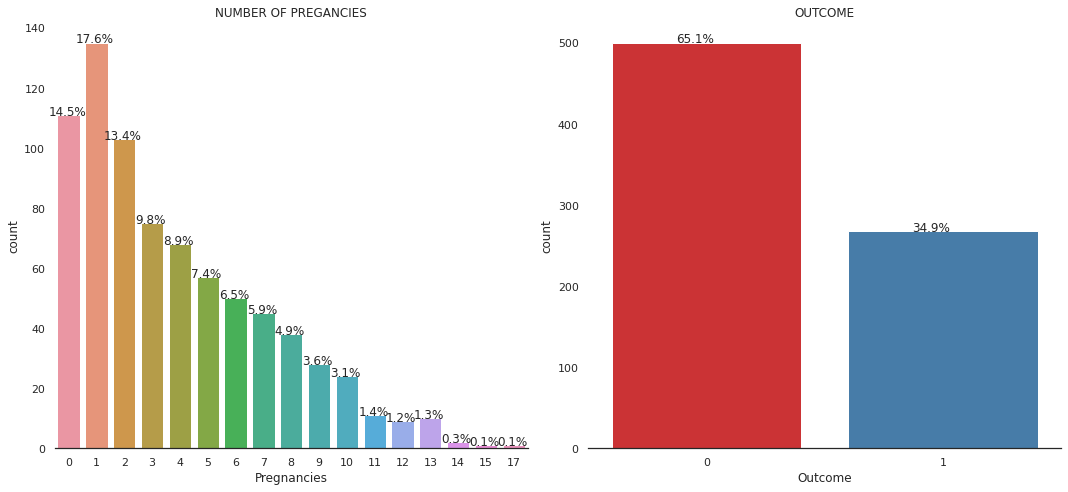

In [9]:
# Making a list of all categorical variables
cat_columns = ['Pregnancies','Outcome']
title=['Number of Pregancies','Outcome']
plt.figure(figsize=(15,7))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
for i, variable in enumerate(cat_columns):
                     plt.subplot(1,2,i+1)
                     order = data[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set1')
                     ax=sns.countplot(x=data[variable], data=data )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())
                                     


**Observations**
* The data is slightly imbalanced as there are only ~35% of the women in data who are diabetic and ~65% of women who are not diabetic.
* The most common number of pregnancies amongst women is 1.
* Surprisingly, there are many observations with more than 10 pregnancies.

### Bivariate Analysis

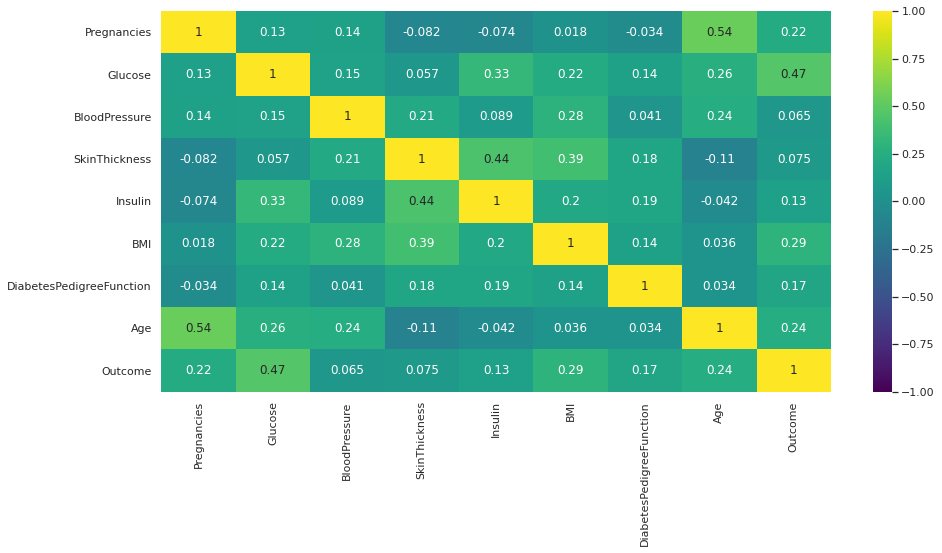

In [10]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')
plt.show()

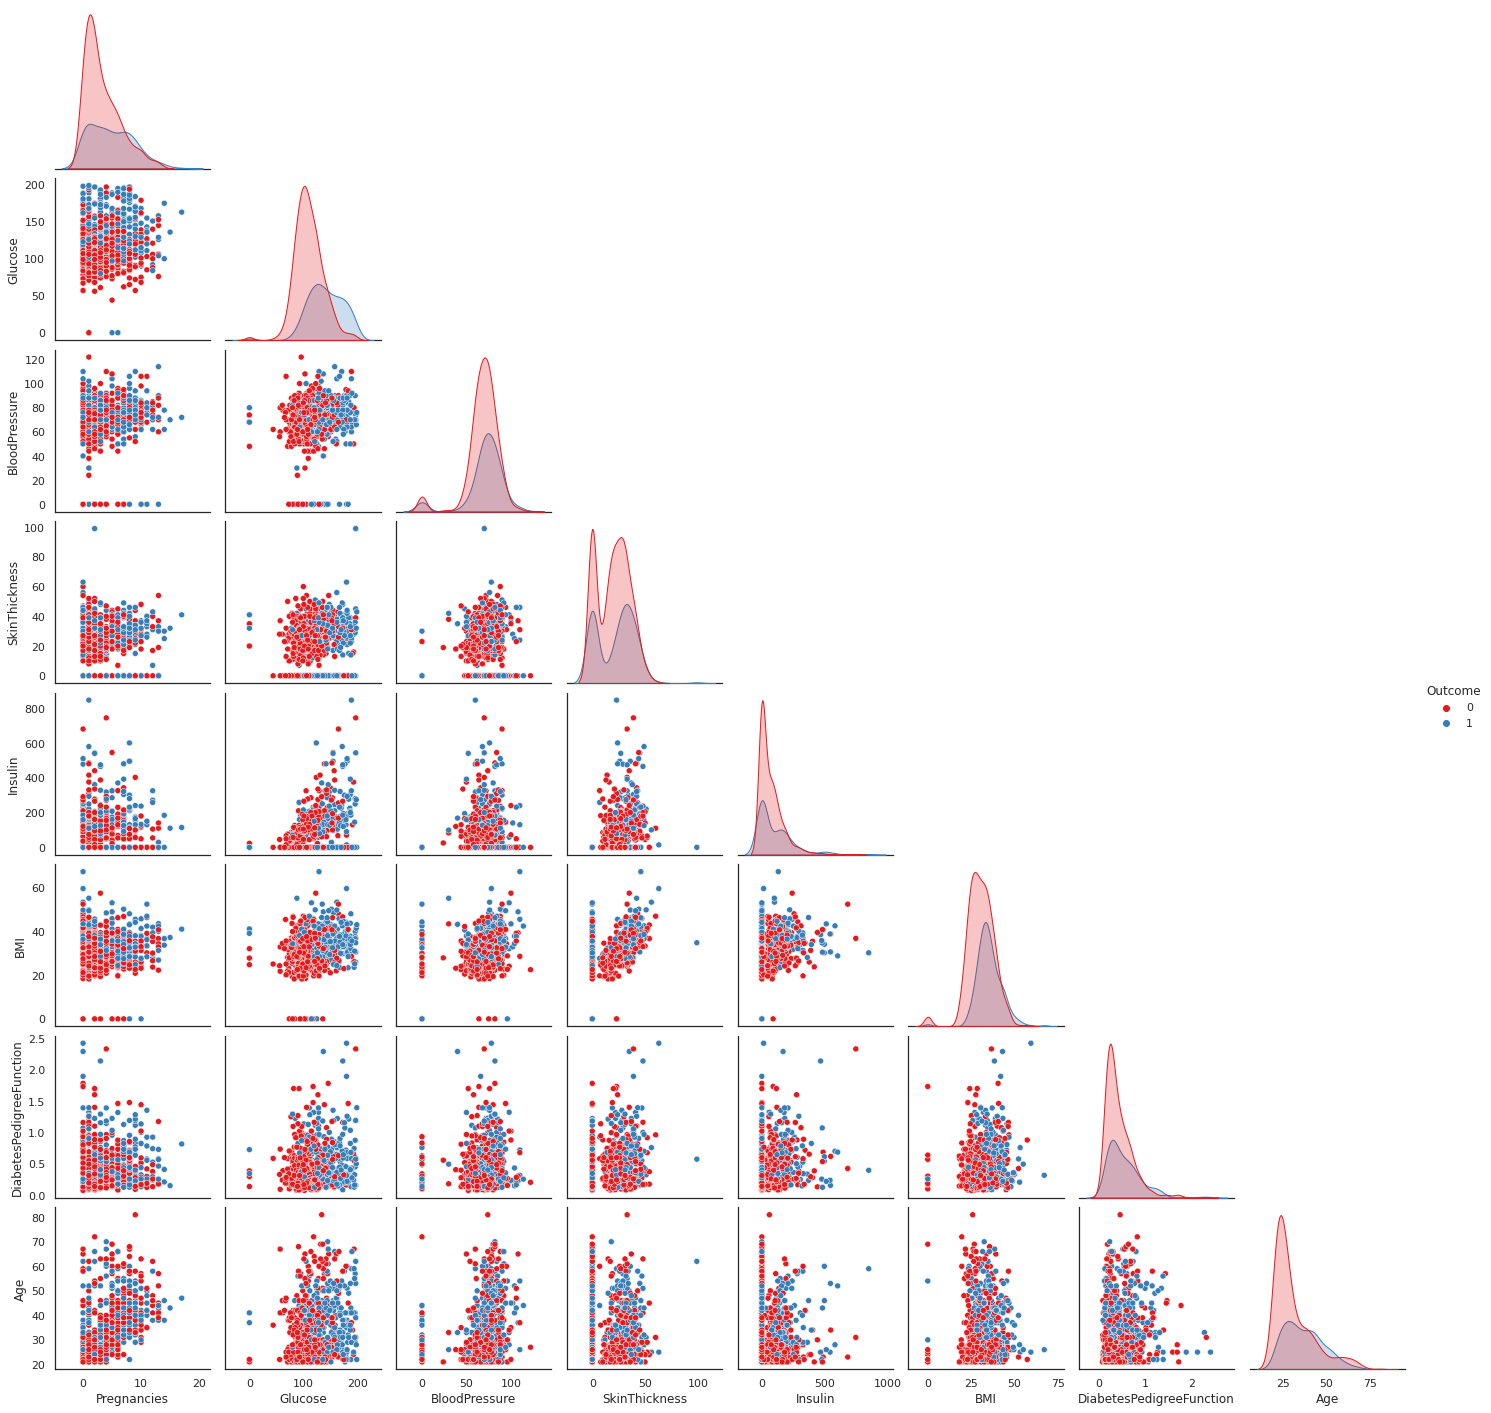

In [11]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(data=data,hue="Outcome",corner=True)
plt.show()

**Observations**
* Outcome variable class shows a moderate correlation with 'Glucose'.
* There is a positive correlation between age and number of pregnancies which makes sense.
* Insulin and skin thickness also shows a moderate positive correlation.
* We can see that most non-diabetic persons have glucose concentration<=100 and BMI<30 
* However, there are overlapping distributions for diabetic and non-diabetic persons. We should investigate it further.

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

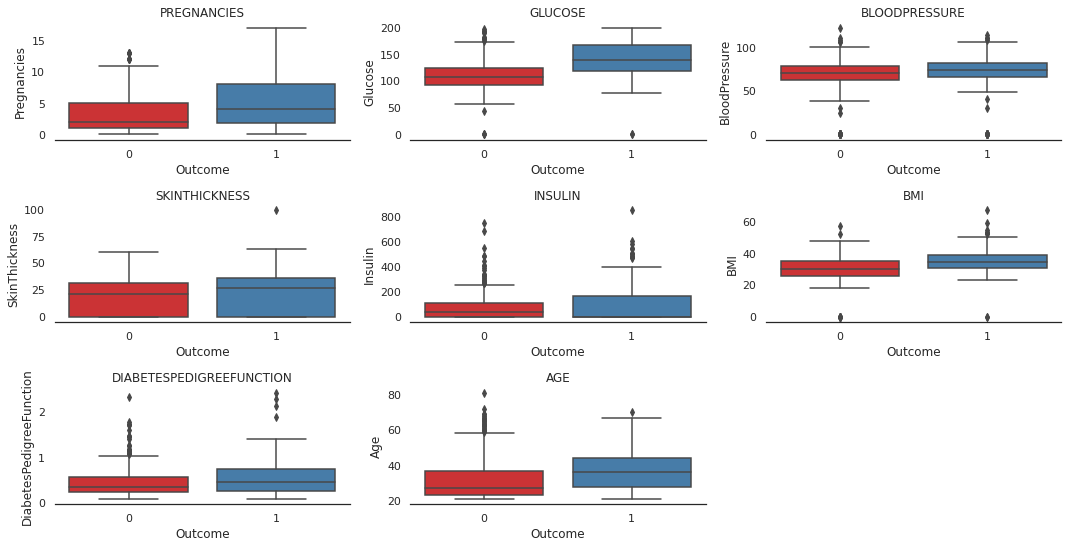

In [13]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age',]
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set1", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='Outcome',y= data[variable], data=data)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

**Observation**
* There is not much difference between the blood pressure levels of a diabetic and a non-diabetic person.
* There is one outlier with very high skin thickness in diabetic patients
* Skin thickness  doesn't  seem to significant in likelihood of diabetes.

## Insights based on EDA

* Diabetes is more prominent in women with more pregnancies.
* Higher plasma glucose concentration is seen in Women with diabetes. 
* Higher levels of insulin is found in women having diabetes.
* Women  with diabetes have higher BMI.
* Diabetic women have higher diabetes pedigree function value suggesting family history matters.
* Age does play an important role,Diabetes is more prominent in middle age to older aged women.
* Skin thickness doesnt seem to play any significant role in likelihood of diabetes.

### Handling Missing value 
Glucose, Blood pressure, SkinThickness , Insulin ,BMI had  0 values replacing them  by median of the respective variable

In [14]:
data.loc[data.Glucose == 0, 'Glucose'] = data.Glucose.median()
data.loc[data.BloodPressure == 0, 'BloodPressure'] = data.BloodPressure.median()
data.loc[data.SkinThickness == 0, 'SkinThickness'] = data.SkinThickness.median()
data.loc[data.Insulin == 0, 'Insulin'] = data.Insulin.median()
data.loc[data.BMI == 0, 'BMI'] = data.BMI.median()

## Split Data

In [15]:
X = data.drop('Outcome',axis=1)
y = data['Outcome'] 

In [16]:
# Splitting data into training and test set:
#The Stratify arguments maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


In [17]:
y.value_counts(1)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [18]:
y_test.value_counts(1)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

In [19]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))


## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person doesn't have diabetes when in reality the person has diabetes.[False Negative, undiagnosed illness]
2. Predicting a person has diabetes, when in reality the person doesn't have diabetes.[False Postive, require more Testing]

### Which case is more important? 
* Predicting a person doesn't have diabetes, when in reality the person has diabetes is a bigger risk.The person will go undiagnosed resulting into severe helath impact.

### Which metric to optimize?
* We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person is at risk of diabetes and in reality, that person doesn't have diabetes then that person can go through further levels of testing to confirm whether the person is actually at risk of diabetes but if we predict that a person is not at risk of diabetes when in reality  the person is at risk of diabetes then that person will go undiagnosed and this would lead to further health problems.

In [20]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Reds',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()

In [21]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,flag=True):
    '''
    model : classifier to predict values of X
    '''
    # defining an empty list to store train and test results
    score_list=[] 
    pred_train = model.predict(X_train_df)
    pred_test = model.predict(X_test_df)
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",round(train_acc,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",round(test_acc,3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m",round(train_recall,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" , round(test_recall,3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m", round(train_precision,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ", round(test_precision,3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",round(train_f1,3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m", round(test_f1,3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
    return score_list # returning the list with train and test scores

In [22]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''Add score to list for comparision'''  
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

# Model building

### Decision Tree

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.727
 Recall     : Train: 1.0  Test: 0.568
 Precision  : Train: 1.0  Test:  0.622
 F1         : Train: 1.0  Test: 0.594


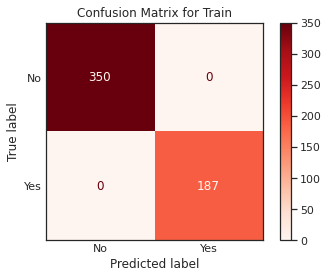

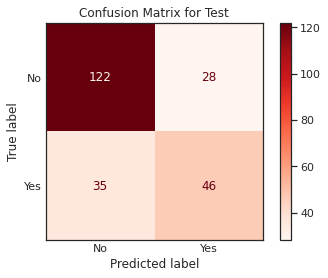

In [23]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train_scaled_df,y_train)

#Calculating different metrics
score_list_dt=get_metrics_score(d_tree,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

In [24]:
add_score_model(score_list_dt)

* Decision tree is overfitting the training data as there is huge disparity between training and test scores for all the metrics.
* The test recall is very low i.e. only 58%.

### Random Forest

 MODEL PERFORMANCE
 Accuracy   : Train: 1.0  Test:  0.753
 Recall     : Train: 1.0  Test: 0.543
 Precision  : Train: 1.0  Test:  0.688
 F1         : Train: 1.0  Test: 0.607


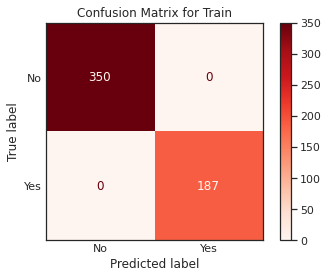

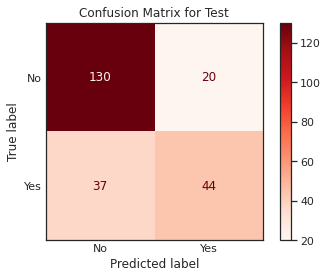

In [25]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train_scaled_df,y_train)
score_list_rf=get_metrics_score(rf_estimator,X_train_scaled_df,X_test_scaled,y_train,y_test)

In [26]:
add_score_model(score_list_rf)

* Random forest is overfitting the training data as there is huge disparity between training and test scores for all the metrics.
* The test recall is even lower than the decision tree but has a higher test precision.

### Bagging Classifier

 MODEL PERFORMANCE
 Accuracy   : Train: 0.994  Test:  0.736
 Recall     : Train: 0.984  Test: 0.556
 Precision  : Train: 1.0  Test:  0.643
 F1         : Train: 0.992  Test: 0.596


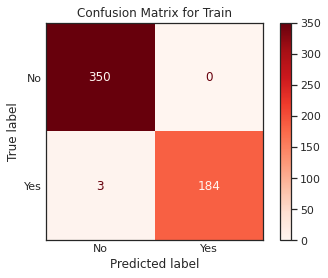

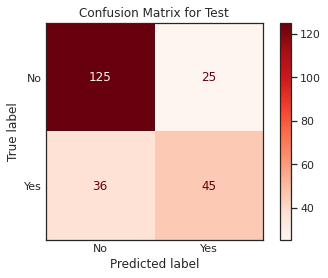

In [27]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train_scaled_df,y_train)

score_list_bc=get_metrics_score(bagging_classifier,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

In [28]:
add_score_model(score_list_bc)

* Bagging classifier giving similar performance as random forest.
* It is also overfitting the training data and lower test recall than decision trees.

### Tuning Decision Tree

**Hyperparameter tuning**

**max_depth:**The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf:**The minimum number of samples required to be at a leaf node.

**max_leaf_nodes:** Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**min_impurity_decrease:**A node will be split if this split induces a decrease of the impurity greater than or equal to this value.



In [29]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.40,1:0.60},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [None], 
              'min_samples_leaf': [10, 7, 5],
              'max_leaf_nodes' : [ 5,7, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_scaled_df, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train_scaled_df, y_train)

DecisionTreeClassifier(class_weight={0: 0.4, 1: 0.6}, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, min_samples_leaf=10,
                       random_state=1)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.76  Test:  0.693
 Recall     : Train: 0.84  Test: 0.753
 Precision  : Train: 0.613  Test:  0.545
 F1         : Train: 0.709  Test: 0.632


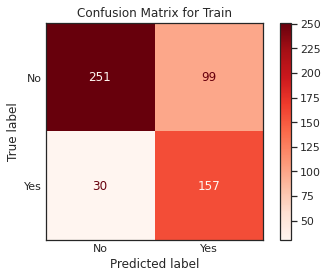

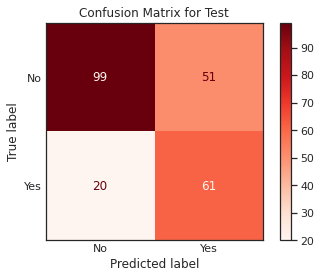

In [30]:
score_tune_dt=get_metrics_score(dtree_estimator,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

In [31]:
add_score_model(score_tune_dt)

* The test recall has increased to 75 and the decision tree is giving a generalized performance.
* The confusion matrix shows that false negative cases are decreased.

### Tuning Random Forest

**n_estimators:** The number of trees in the forest.

**max_depth:** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

**min_samples_leaf:** The minimum number of samples required to be at a leaf node.

**max_features:** The number of features to consider when looking for the best split
If int, then consider max_features features at each split.
If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

**max_samples:** If bootstrap is True, the number of samples to draw from X to train each base estimator.




In [32]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = { "max_depth":[None],
              "n_estimators": [150,200,250,500],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": ['auto'],
    "max_samples": np.arange(0.3,0.5, 0.7)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_scaled_df, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train_scaled_df, y_train)

RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, max_samples=0.3,
                       min_samples_leaf=9, n_estimators=500, random_state=1)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.825  Test:  0.727
 Recall     : Train: 0.824  Test: 0.679
 Precision  : Train: 0.716  Test:  0.598
 F1         : Train: 0.766  Test: 0.636


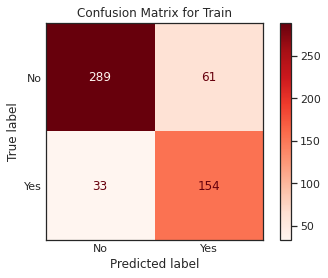

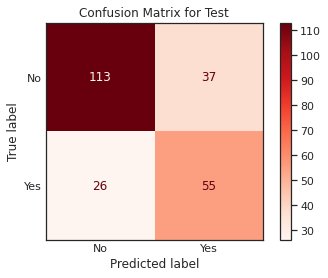

In [33]:
score_tune_rt=get_metrics_score(rf_tuned,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

* The test recall has increased significantly after hyperparameter tuning but the  model is still overfitting the training data.
* The confusion matrix shows that the model is able to identify majority of patients who are at risk of diabetes.

In [34]:
add_score_model(score_tune_rt)

### Tuning Bagging Classifier

In [35]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50,90],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_scaled_df, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train_scaled_df, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=90,
                  random_state=1)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.989  Test:  0.736
 Recall     : Train: 0.973  Test: 0.543
 Precision  : Train: 0.995  Test:  0.647
 F1         : Train: 0.984  Test: 0.591


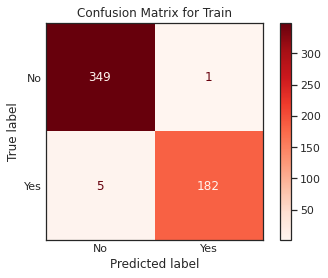

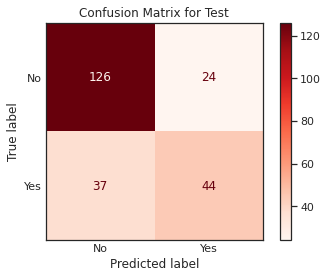

In [36]:
score_tune_bg=get_metrics_score(bagging_estimator_tuned,X_train_scaled_df,X_test_scaled_df,y_train,y_test)

* Surprisingly, the test recall has decreased after hyperparameter tuning and the  model is still overfitting the training data.
* The confusion matrix shows that the model predicted 37 false negative patients

In [37]:
add_score_model(score_tune_bg)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.855  Test:  0.727
 Recall     : Train: 0.684  Test: 0.457
 Precision  : Train: 0.871  Test:  0.661
 F1         : Train: 0.766  Test: 0.54


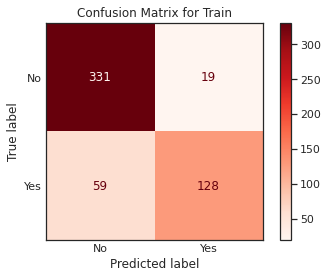

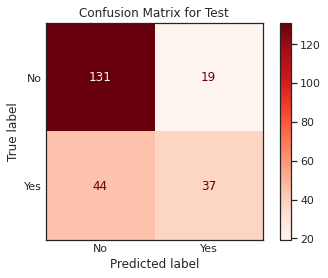

In [38]:
from sklearn.svm import SVC
SVC_Classifier=SVC()
SVC_Classifier.fit(X_train_scaled_df,y_train)
score_svc=get_metrics_score(SVC_Classifier,X_train_scaled_df,X_test_scaled_df,y_train,y_test)
add_score_model(score_svc)

## Comparing all the models

In [39]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree',
                                          'Random Forest',
                                          'Bagging Classifier',
                                          'Tuned Decision Tree',
                                          'Tuned Random Forest',
                                          'Bagging Classifier Tuned','SVC'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Recall',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
3,Tuned Decision Tree,0.759777,0.692641,0.839572,0.753086,0.613281,0.544643
4,Tuned Random Forest,0.824953,0.727273,0.823529,0.679012,0.716279,0.597826
0,Decision Tree,1.000000,0.727273,1.000000,0.567901,1.000000,0.621622
2,Bagging Classifier,0.994413,0.735931,0.983957,0.555556,1.000000,0.642857
1,Random Forest,1.000000,0.753247,1.000000,0.543210,1.000000,0.687500
5,Bagging Classifier Tuned,0.988827,0.735931,0.973262,0.543210,0.994536,0.647059
6,SVC,0.854749,0.727273,0.684492,0.456790,0.870748,0.660714


* Tuned decision tree is the best model for our data as it has the highest test recall and giving a generalized performance as compared to other models.False negative cases are 20.

### Feature importance of tuned decision tree

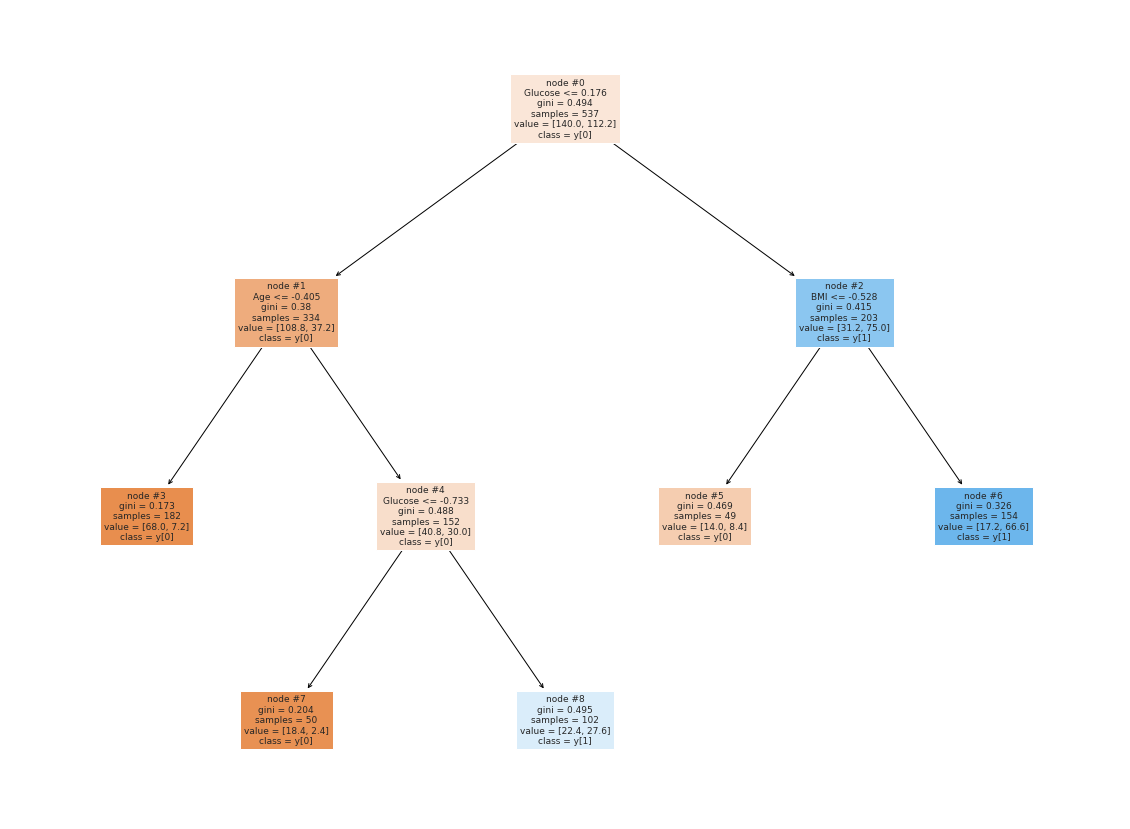

In [40]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20,15))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [41]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(dtree_estimator,feature_names=feature_names,show_weights=True))

|--- Glucose <= 0.18
|   |--- Age <= -0.40
|   |   |--- weights: [68.00, 7.20] class: 0
|   |--- Age >  -0.40
|   |   |--- Glucose <= -0.73
|   |   |   |--- weights: [18.40, 2.40] class: 0
|   |   |--- Glucose >  -0.73
|   |   |   |--- weights: [22.40, 27.60] class: 1
|--- Glucose >  0.18
|   |--- BMI <= -0.53
|   |   |--- weights: [14.00, 8.40] class: 0
|   |--- BMI >  -0.53
|   |   |--- weights: [17.20, 66.60] class: 1



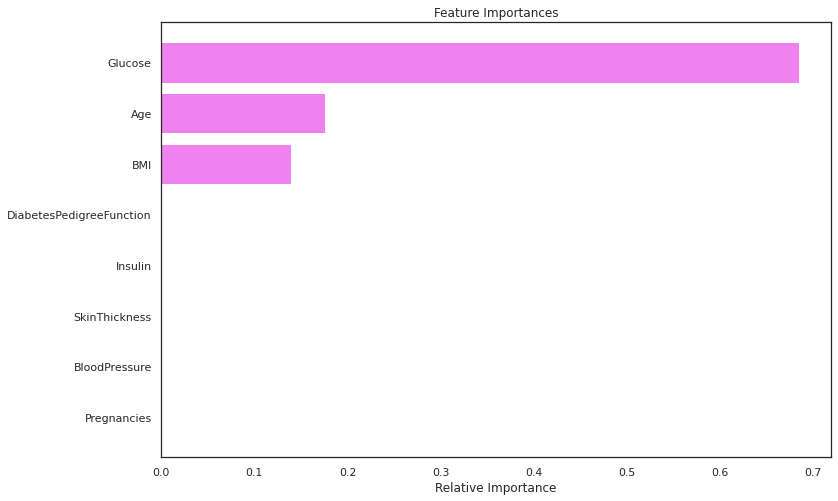

In [42]:
feature_names = X_train.columns
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* We can see that Glucose concentration is the most important feature followed by Age and BMI.
* The tuned decision tree is using only three variable to separate the two classes. 

## Misclassification Analysis

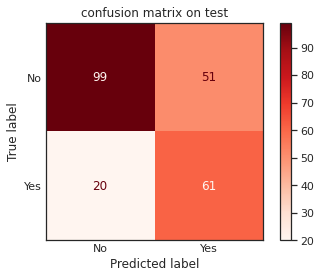

In [43]:
y_pred = dtree_estimator.predict(X_test_scaled_df)
make_confusion_matrix(y_test,y_pred,"confusion matrix on test")
misclass_df = X_test.copy()
misclass_df['Actual']=y_test
misclass_df['Predicted'] = y_pred


([<matplotlib.patches.Wedge at 0x7f99c1ebe3d0>,
 [Text(-0.6915841484685733, 0.8554012892128459, ''),
  Text(0.6915841484685735, -0.8554012892128456, '')],
 [Text(-0.37722771734649446, 0.46658252138882494, '71.6%'),
  Text(0.3772277173464946, -0.46658252138882483, '28.4%')])

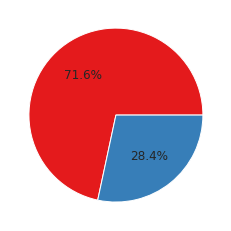

In [44]:
plt.pie(data=misclass_df,x=misclass_df["Actual"].value_counts(),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f99c1f98310>,
 [Text(-0.05234005752840467, 1.098754075477276, ''),
  Text(0.052340057528404045, -1.098754075477276, '')],
 [Text(-0.028549122288220725, 0.5993204048057869, '51.5%'),
  Text(0.02854912228822038, -0.5993204048057869, '48.5%')])

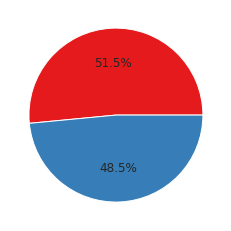

In [45]:
plt.pie(data=misclass_df,x=misclass_df["Predicted"].value_counts(),autopct='%1.1f%%')

Percentage of value predicted by our model close to the actual values. Lets find out False Negative and False Positive observations

In [46]:
pd.crosstab(misclass_df['Predicted'],misclass_df['Actual'],margins=True)

Actual,0.0,1.0,All
Predicted,,,
0,19,8,27
1,29,11,40
All,48,19,67


In [47]:
# Rows that were classified as Negative when they were actually positive
fn_rows = misclass_df[(misclass_df['Actual'] == 1) & (misclass_df['Predicted'] == 0)]
False_negative= data[data.index.isin(fn_rows.index.values)].copy()
False_negative.sort_values(by=['Glucose','Age','BMI'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
149,2,90.0,70.0,17.0,30.5,27.3,0.085,22,0
50,1,103.0,80.0,11.0,82.0,19.4,0.491,22,0
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28,0
121,6,111.0,64.0,39.0,30.5,34.2,0.260,24,0
205,5,111.0,72.0,28.0,30.5,23.9,0.407,27,0
75,1,117.0,48.0,20.0,30.5,24.7,0.140,22,0
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0
28,13,145.0,82.0,19.0,110.0,22.2,0.245,57,0


Model was not able to predict correctly `13` patients whose glucose levels were less than 127 but either there BMI was high or Age.`7` patients who glucose concentration was high but BMI was low were also predicted incorrectly.

## Conclusion
* Glucose, Age, and BMI are the most important factors in identifying persons who are at risk of diabetes. Other variables' importance is not significant. 
* Identifying the risk of diabetes at early stages, especially among pregnant women, can help to control the disease and prevent the second health problems.
* As per the decision tree We can have Profile for women
    - `Lower Risk Women` :Glucose level <=127 ,Age <=28.
    - `Higher Risk Women`:Glucose level >100 ,Age >28 /BMI> 28.5
    
    But as per the patterns we see in misclassfied data.Our model is unable to find those case when Age or BMI plays major role than Glucose concentration.
    So Glucose ,Age and BMI should be  given equal importance in identifying high risk patients.
 * Need to further explore if any other algorthims or more hypertuning parameters help in improving the accuracy of the model along with recall.
 
 ## Recommendation
  Depending on the patients profile following recommendation to patients can prevent them from getting diabetes.
* Middle aged to older women have a higher risk of diabetes. They should keep the glucose level in check and take proper precautions.
* Overweight women have a higher risk of diabetes. They should keep the glucose level in check and exercise regularly. 
